In [ ]:
!pip install torch torchvision torchaudio
!pip install gdown
!pip install numpy
!pip install tqdm


In [ ]:
!mkdir dataset
!cd dataset
!pip install gdown
!gdown https://drive.google.com/uc?id=0B2i-vWnOu7MxVlJwQXN6eVNONUU
!tar -xvf programs.tar.gz
!cd ..


Streaming output truncated to the last 5000 lines.
ProgramData/95/261.txt
ProgramData/95/1389.txt
ProgramData/95/1404.txt
ProgramData/95/787.txt
ProgramData/95/1080.txt
ProgramData/95/108.txt
ProgramData/95/1551.txt
ProgramData/95/1543.txt
ProgramData/95/1094.txt
ProgramData/95/417.txt
ProgramData/95/1084.txt
ProgramData/95/1118.txt
ProgramData/95/1517.txt
ProgramData/95/834.txt
ProgramData/95/1534.txt
ProgramData/95/609.txt
ProgramData/95/250.txt
ProgramData/95/629.txt
ProgramData/95/1036.txt
ProgramData/95/630.txt
ProgramData/95/1331.txt
ProgramData/95/1344.txt
ProgramData/95/614.txt
ProgramData/95/133.txt
ProgramData/95/621.txt
ProgramData/95/88.txt
ProgramData/95/1471.txt
ProgramData/95/1184.txt
ProgramData/95/950.txt
ProgramData/95/214.txt
ProgramData/95/1173.txt
ProgramData/95/356.txt
ProgramData/95/660.txt
ProgramData/95/205.txt
ProgramData/95/270.txt
ProgramData/95/645.txt
ProgramData/95/718.txt
ProgramData/95/892.txt
ProgramData/95/1542.txt
ProgramData/95/562.txt
ProgramData/9

In [ ]:
!python preprocess.py

100% 64/64 [00:01<00:00, 32.61it/s]
100% 16/16 [00:00<00:00, 26.18it/s]
100% 24/24 [00:01<00:00, 17.89it/s]


In [ ]:
!pip install tensorflow numpy pandas


In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Load the data from train.json
def load_data(file_path, sample_fraction=0.01):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    # Sample 1% of the data
    sample_size = max(1, int(len(data) * sample_fraction))
    return [item['code'] for item in data[:sample_size]]

# Prepare the dataset
codes = load_data('train.jsonl')
data = ' '.join(codes)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
total_words = len(tokenizer.word_index) + 1

# Create sequences
input_sequences = []
for line in data.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)


# import re

# # Custom tokenization function to include symbols
# def custom_tokenize(code):
#     # Regular expression to match words and symbols
#     code = re.sub(r'//.*', '', code)  # Remove everything after //

#     tokens = re.findall(r'\w+|[^\w\s]', code)
#     return tokens

# # Assuming `data` contains your loaded code snippets
# input_sequences = []
# for line in data.split('\n'):
#     # print(line)

#     # Use custom tokenizer instead of the default tokenizer
#     token_list = custom_tokenize(line)
#     # print("Token List:", token_list)  # Show the token list for debugging

#     # u = []
#     for i in range(1, len(token_list)):
#         n_gram_sequence = token_list[:i + 1]
#         input_sequences.append(n_gram_sequence)
#         # u.append(n_gram_sequence)

#     # print("UUU", u)

# Continue with your existing code to create sequences and train the model...

# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Step 2: Model Creation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(SimpleRNN(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Training
model.fit(X, y, epochs=100, verbose=1)

# Step 4: Prediction Function
def predict_next_word(model, tokenizer, text):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    return tokenizer.index_word[predicted_word_index[0]]

# Example usage
input_text = 'int ys(int x,'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
223/570 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1758 - loss: 4.0690

KeyboardInterrupt: 

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import re

# Load the data from train.json
def load_data(file_path, sample_fraction=0.01):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    # Sample 1% of the data
    sample_size = max(1, int(len(data) * sample_fraction))
    return [item['code'] for item in data[:sample_size]]

# Custom tokenization function to include symbols and ignore comments
def custom_tokenize(code):
    # Remove comments that start with //
    code = re.sub(r'//.*', '', code)  # Remove everything after //
    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

# Prepare the dataset
codes = load_data('train.jsonl')
data = ' '.join(codes)

# Tokenization
input_sequences = []
for line in data.split('\n'):
    # Use custom tokenizer instead of the default tokenizer
    token_list = custom_tokenize(line)

    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Create the tokenizer and fit on the tokenized sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts([' '.join(seq) for seq in input_sequences])  # Fit on space-joined sequences
total_words = len(tokenizer.word_index) + 1

input_sequences = [tokenizer.texts_to_sequences([' '.join(seq)])[0] for seq in input_sequences]


# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Step 2: Model Creation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(SimpleRNN(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 3: Training
model.fit(X, y, epochs=10, verbose=1)

# Step 4: Prediction Function
def predict_next_word(model, tokenizer, text):
    # Use custom tokenizer for the input text
    token_list = custom_tokenize(text)
    token_list = tokenizer.texts_to_sequences([' '.join(token_list)])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    return tokenizer.index_word[predicted_word_index[0]]

# Example usage
input_text = 'int ys(int x,'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')


Epoch 1/10
 465/1467 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.2171 - loss: 3.8215

KeyboardInterrupt: 

In [ ]:
input_text = 'int main void a int i'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')

Next word prediction: 0


In [ ]:
data

'struct node\n{\n\tint s,n;\n};\nvoid cpy_clr(struct node a[],struct node b[])\n{\n\tint i;\n\tfor(i=0;i<=MAX&&(a[i].s!=0||b[i].s!=0);i++)\n\t\tif(b[i].s!=0)\n\t\t{a[i].s=b[i].s;a[i].n=b[i].n;b[i].s=0;b[i].n=0;}\n\t\telse\n\t\t{a[i].s=0;a[i].n=0;b[i].n=0;}\n}\nint chklst(struct node a[],int n)\n{\n\tint i;\n\tint result=0;\n\tfor(i=0;a[i].s!=0;i++)\n\t{\tif(a[i].s!=n){result=0;break;}\n\t\telse result++;\n\t}\n\treturn result;\n}\nvoid init(struct node a[])\n{\n\tint i;\n\tfor(i=0;i<MAX;i++) {a[i].s=0;a[i].n=0;}\n}\nvoid main()\n{\n\tstruct node a[MAX],b[MAX];\t\n\tint i,j,k,l,_n,n,sum=0;\n\tscanf("%d",&n);\n\twhile(n--)\n\t{\n\tscanf("%d",&_n);\n\tfor(l=2;l<_n;l++) \n\t\tif(_n%l==0)\t\n\t\t{\tinit(a);init(b); \n\t\t\ta[0].s=l;a[0].n=l;\n\t\t\twhile(chklst(a,_n)==0&&a[0].s!=0)\n\t\t\t{\n\t\t\t\ti=0;k=-1;\n\t\t\t\tif(a[0].s==0) break;\n\t\t\t\twhile(a[i].s!=0)\n\t\t\t\t{\n\t\t\t\t\tif(a[i].s==_n) sum++;\n\t\t\t\t\telse\n\t\t\t\t\t{\n\t\t\t\t\t\tfor(j=a[i].n;j<=(_n/a[i].s);j++)\n\t\t\t\t

In [ ]:
int('int')

ValueError: invalid literal for int() with base 10: 'int'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
import re
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the data from train.json
def load_data(file_path, sample_fraction=0.01):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    # Sample 1% of the data
    sample_size = max(1, int(len(data) * sample_fraction))
    return [item['code'] for item in data[:sample_size]]

# Custom tokenization function to include symbols and ignore comments
def custom_tokenize(code):
    code = re.sub(r'//.*', '', code)  # Remove everything after //
    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

# Prepare the dataset
codes = load_data('train.jsonl')
data = ' '.join(codes)
data = 'nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnkkkknn'.join(codes)


# Tokenization
input_sequences = []
for line in data.split('nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnkkkknn'):
    token_list = custom_tokenize(line)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Create the tokenizer and fit on the tokenized sequences
tokenizer = Tokenizer(filters='', lower=True, split=' ')
tokenizer.fit_on_texts([' '.join(seq) for seq in input_sequences])
total_words = len(tokenizer.word_index) + 1

input_sequences = [tokenizer.texts_to_sequences([' '.join(seq)])[0] for seq in input_sequences]

# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Creation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(SimpleRNN(100))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Step 4: Training with validation accuracy
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])
model.save('/content/drive/My Drive/my_model_autocomplete_rnn.keras')

# Step 5: Prediction Function
def predict_next_word(model, tokenizer, text):
    token_list = custom_tokenize(text)
    token_list = tokenizer.texts_to_sequences([' '.join(token_list)])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    return tokenizer.index_word[predicted_word_index[0]]

# Example usage
input_text = 'int ys(int x,'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')


Epoch 1/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 381s 271ms/step - accuracy: 0.2816 - loss: 3.2979 - val_accuracy: 0.5817 - val_loss: 1.8033
Epoch 2/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 388s 275ms/step - accuracy: 0.5921 - loss: 1.7620 - val_accuracy: 0.6312 - val_loss: 1.5588
Epoch 3/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 445s 278ms/step - accuracy: 0.6379 - loss: 1.5240 - val_accuracy: 0.6570 - val_loss: 1.4295
Epoch 4/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 452s 324ms/step - accuracy: 0.6604 - loss: 1.3962 - val_accuracy: 0.6740 - val_loss: 1.3571
Epoch 5/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 454s 325ms/step - accuracy: 0.6736 - loss: 1.3396 - val_accuracy: 0.6861 - val_loss: 1.3003
Epoch 6/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 501s 325ms/step - accuracy: 0.6872 - loss: 1.2510 - val_accuracy: 0.6909 - val_loss: 1.2627
Epoch 7/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 494s 319ms/step - accuracy: 0.6915 - loss: 1.2186 - val_accuracy: 0.7017 - val_loss: 1.2287
Epoch 8/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 511s 325ms/step - ac

Next word prediction: int


In [85]:
from tensorflow.keras.utils import plot_model


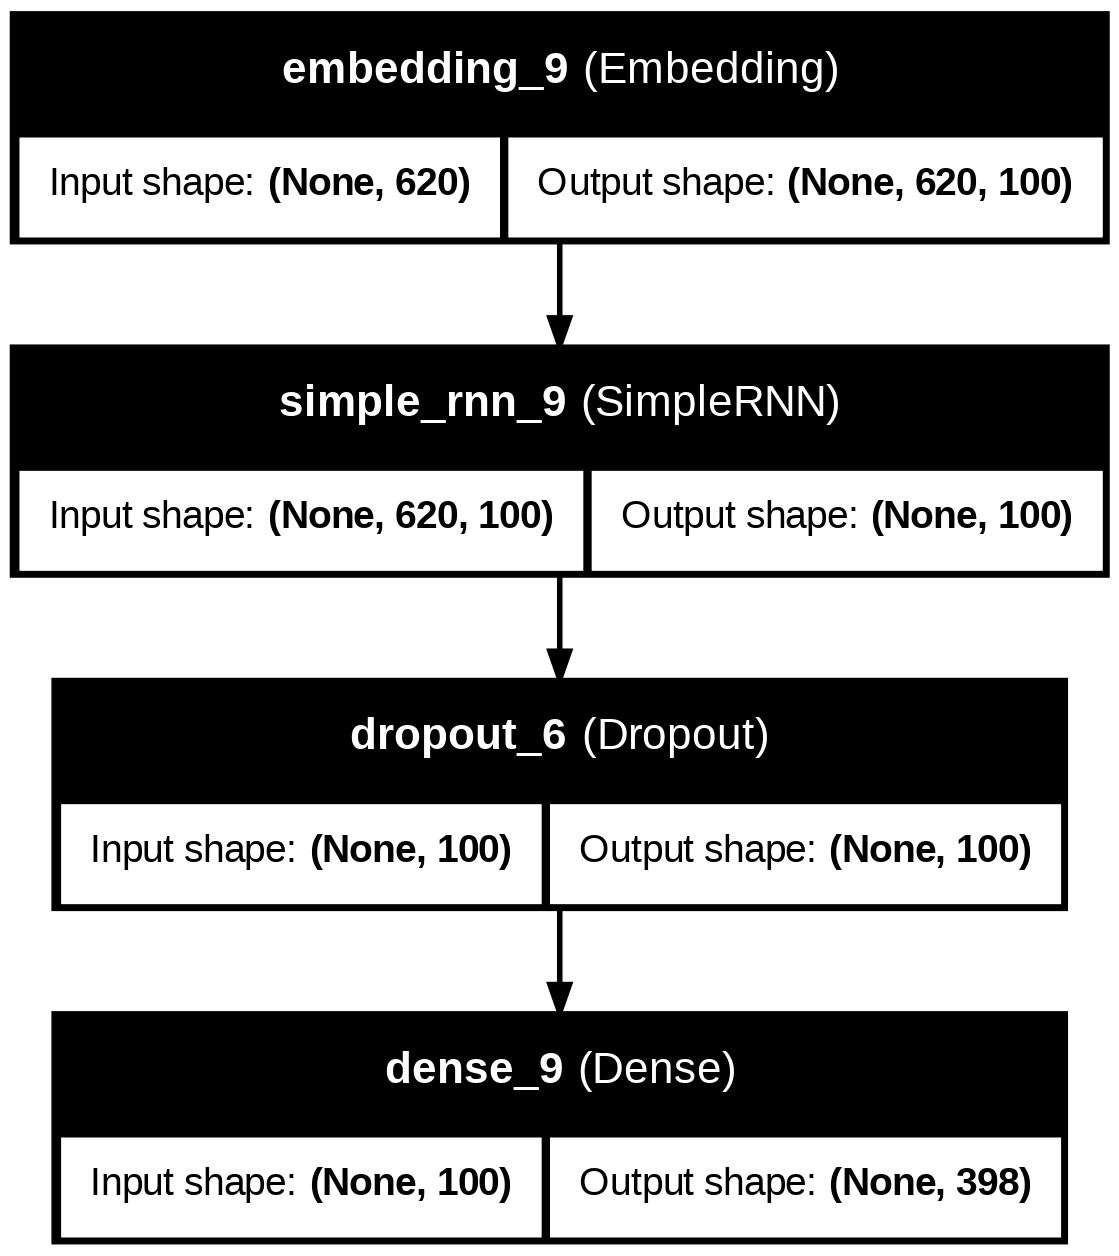

In [86]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [83]:
input_text = '''int ys(int x,int min){
  int i,j;
  if(a==1'''
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')

Next word prediction: )


In [ ]:
model.save('/content/drive/My Drive/my_model_autocomplete_rnn.keras')


# LSTM CODE

In [87]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout,LSTM
from sklearn.model_selection import train_test_split
import re
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the data from train.json
def load_data(file_path, sample_fraction=0.01):
    with open(file_path, 'r') as f:
        data = [json.loads(line) for line in f]
    # Sample 1% of the data
    sample_size = max(1, int(len(data) * sample_fraction))
    return [item['code'] for item in data[:sample_size]]

# Custom tokenization function to include symbols and ignore comments
def custom_tokenize(code):
    code = re.sub(r'//.*', '', code)  # Remove everything after //
    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

# Prepare the dataset
codes = load_data('train.jsonl')
data = ' '.join(codes)
data = 'nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnkkkknn'.join(codes)


# Tokenization
input_sequences = []
for line in data.split('nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnkkkknn'):
    token_list = custom_tokenize(line)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Create the tokenizer and fit on the tokenized sequences
tokenizer = Tokenizer(filters='', lower=True, split=' ')
tokenizer.fit_on_texts([' '.join(seq) for seq in input_sequences])
total_words = len(tokenizer.word_index) + 1

input_sequences = [tokenizer.texts_to_sequences([' '.join(seq)])[0] for seq in input_sequences]

# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Creation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(LSTM(100))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_lstm.keras', monitor='val_accuracy', save_best_only=True)

# Step 4: Training with validation accuracy
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])
model.save('/content/drive/My Drive/my_model_autocomplete_lstm.keras')

# Step 5: Prediction Function
def predict_next_word(model, tokenizer, text):
    token_list = custom_tokenize(text)
    token_list = tokenizer.texts_to_sequences([' '.join(token_list)])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    return tokenizer.index_word[predicted_word_index[0]]

# Example usage
input_text = 'int ys(int x,'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 992s 708ms/step - accuracy: 0.2535 - loss: 3.3494 - val_accuracy: 0.5628 - val_loss: 1.8431
Epoch 2/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 1006s 682ms/step - accuracy: 0.5938 - loss: 1.7308 - val_accuracy: 0.6631 - val_loss: 1.4283
Epoch 3/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 991s 689ms/step - accuracy: 0.6631 - loss: 1.4055 - val_accuracy: 0.6829 - val_loss: 1.2788
Epoch 4/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 991s 695ms/step - accuracy: 0.6899 - loss: 1.2614 - val_accuracy: 0.7014 - val_loss: 1.2117
Epoch 5/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 923s 653ms/step - accuracy: 0.7019 - loss: 1.1800 - val_accuracy: 0.7175 - val_loss: 1.1560
Epoch 6/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 932s 668ms/step - accuracy: 0.7138 - loss: 1.1224 - val_accuracy: 0.7228 - val_loss: 1.1373
Epoch 7/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 998s 679ms/step - accuracy: 0.7218 - loss: 1.0702 - val_accuracy: 0.7230 - val_loss: 1.1175
Epoch 8/10
1396/1396 ━━━━━━━━━━━━━━━━━━━━ 842s 603ms/step - a

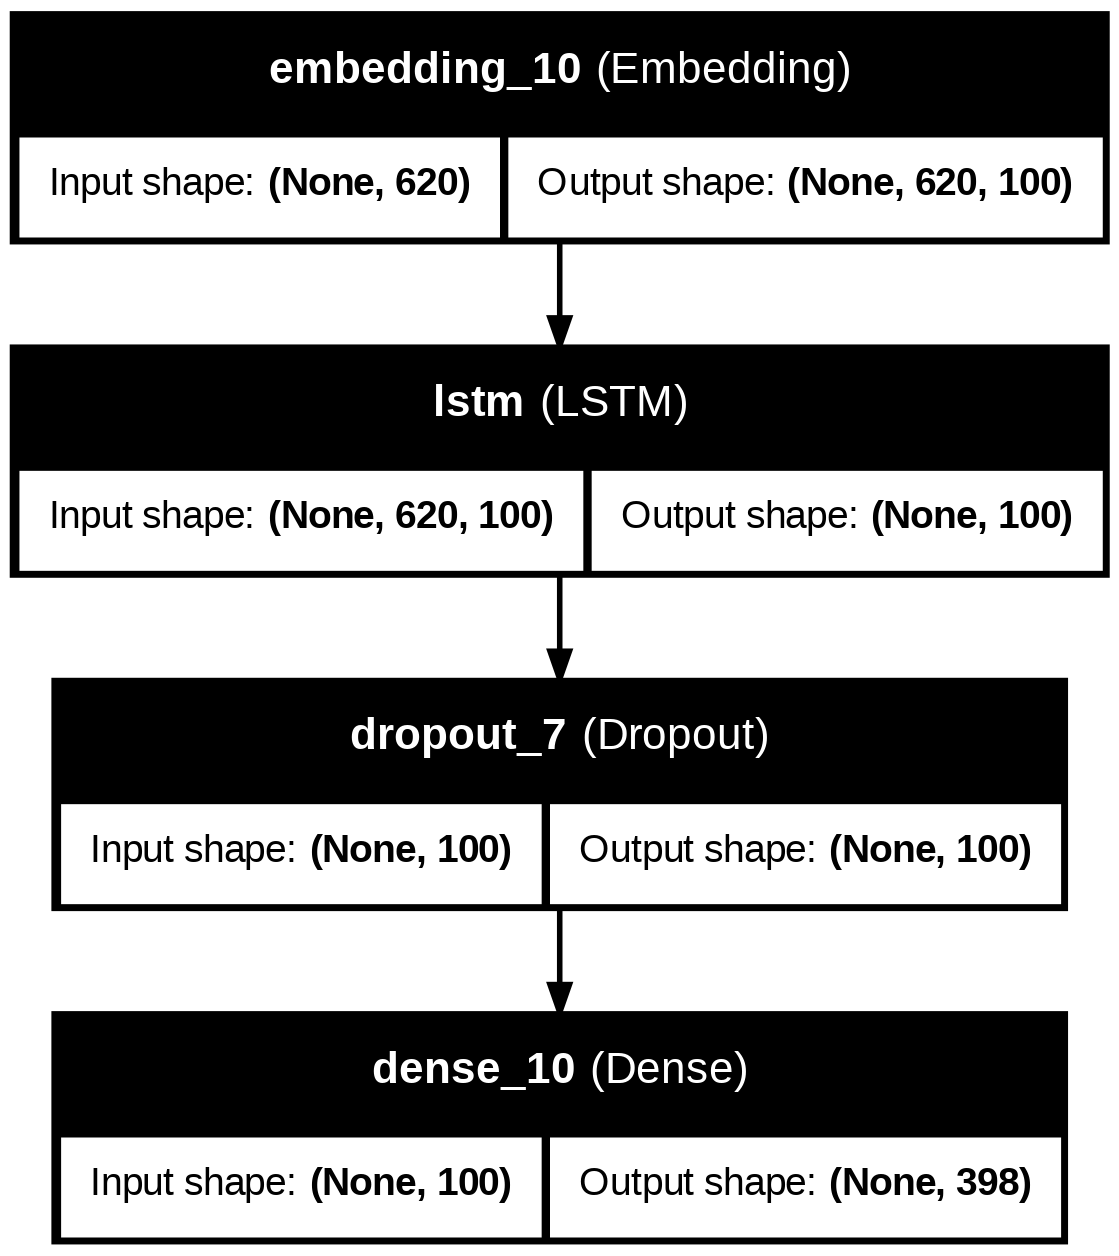

In [88]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
tokenizer.word_index

{';': 1,
 '(': 2,
 '=': 3,
 'int': 4,
 ')': 5,
 'i': 6,
 ',': 7,
 '+': 8,
 '{': 9,
 'n': 10,
 '0': 11,
 '*': 12,
 '?': 13,
 'a': 14,
 '<': 15,
 '}': 16,
 '1': 17,
 'if': 18,
 '[': 19,
 ']': 20,
 'for': 21,
 '>': 22,
 '%': 23,
 '"': 24,
 'j': 25,
 'x': 26,
 'return': 27,
 '/': 28,
 'm': 29,
 'd': 30,
 '&': 31,
 'k': 32,
 'c': 33,
 'main': 34,
 'sum': 35,
 'b': 36,
 'f': 37,
 '2': 38,
 'num': 39,
 'cin': 40,
 'scanf': 41,
 'void': 42,
 '.': 43,
 '-': 44,
 'y': 45,
 's': 46,
 't': 47,
 'min': 48,
 'p': 49,
 'else': 50,
 'sqrt': 51,
 'result': 52,
 'cout': 53,
 ':': 54,
 'fenjie': 55,
 '100': 56,
 'printf': 57,
 'count': 58,
 'endl': 59,
 'q': 60,
 '!': 61,
 'l': 62,
 '\\': 63,
 'while': 64,
 'factor': 65,
 'number': 66,
 'cpp': 67,
 '11': 68,
 '|': 69,
 'break': 70,
 'fun': 71,
 'divide': 72,
 'author': 73,
 'z': 74,
 'created': 75,
 'on': 76,
 'r': 77,
 'ans': 78,
 '1000': 79,
 'struct': 80,
 'node': 81,
 'g': 82,
 '12': 83,
 'yin': 84,
 '3': 85,
 '4': 86,
 '2012': 87,
 'max': 88,
 'temp

In [ ]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer

# Custom tokenization function to include symbols and ignore comments
def custom_tokenize(code):
    # Remove comments that start with //
    code = re.sub(r'//.*', '', code)  # Remove everything after //
    # Capture words and punctuation as tokens
    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

# Custom text for testing
custom_text = """
// This is a sample function
int add(int a, int b) {
    return a + b; // Add two numbers
}
"""

# Initialize the tokenizer with filters (but allow punctuation)
tokenizer = Tokenizer(filters='', lower=True, split=' ')

# Tokenize the custom text using the custom_tokenize function
tokens = custom_tokenize(custom_text)

# Fit the tokenizer on the tokens generated
tokenizer.fit_on_texts([' '.join(tokens)])  # Use space-joined tokens for fitting
total_words = len(tokenizer.word_index) + 1

# Output the tokens and the tokenizer's word index
print("Tokens:", tokens)
print("Tokenizer Word Index:", tokenizer.word_index)
print("Total Words:", total_words)


Tokens: ['int', 'add', '(', 'int', 'a', ',', 'int', 'b', ')', '{', 'return', 'a', '+', 'b', ';', '}']
Tokenizer Word Index: {'int': 1, 'a': 2, 'b': 3, 'add': 4, '(': 5, ',': 6, ')': 7, '{': 8, 'return': 9, '+': 10, ';': 11, '}': 12}
Total Words: 13


In [ ]:
input_sequences = [tokenizer.texts_to_sequences([' '.join(seq)])[0] for seq in input_sequences]

# Pad sequences
max_sequence_length = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

# Create predictors and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Creation
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_length - 1))
model.add(SimpleRNN(100))
model.add(Dropout(0.2))  # Add dropout layer
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Step 4: Training with validation accuracy
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, checkpoint])

# Step 5: Prediction Function
def predict_next_word(model, tokenizer, text):
    token_list = custom_tokenize(text)
    token_list = tokenizer.texts_to_sequences([' '.join(token_list)])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_length - 1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=-1)
    return tokenizer.index_word[predicted_word_index[0]]

# Example usage
input_text = 'int ys(int x,'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')


TypeError: sequence item 0: expected str instance, numpy.int32 found

In [ ]:
[' '.join(seq) for seq in input_sequences]

['struct node',
 'struct node {',
 'struct node { int',
 'struct node { int s',
 'struct node { int s ,',
 'struct node { int s , n',
 'struct node { int s , n ;',
 'struct node { int s , n ; }',
 'struct node { int s , n ; } ;',
 'struct node { int s , n ; } ; void',
 'struct node { int s , n ; } ; void cpy_clr',
 'struct node { int s , n ; } ; void cpy_clr (',
 'struct node { int s , n ; } ; void cpy_clr ( struct',
 'struct node { int s , n ; } ; void cpy_clr ( struct node',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [ ]',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [ ] ,',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [ ] , struct',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [ ] , struct node',
 'struct node { int s , n ; } ; void cpy_clr ( struct node a [ ] , struct node b',
 'struct node 

In [ ]:
input_sequences

array([[  0,   0,   0, ...,   0, 147, 156],
       [  0,   0,   0, ...,   0,   2,  26],
       [  0,   0,   0, ...,   0,   2,  26],
       ...,
       [  0,   0,   0, ...,  15,  19,  40],
       [  0,   0,   0, ...,   0,  23,   6],
       [  0,   0,   0, ...,   0,  23,   6]], dtype=int32)

In [ ]:
print("Tokenizer Word Index:", tokenizer.word_index)


Tokenizer Word Index: {'int': 1, 'i': 2, 'n': 3, '0': 4, 'a': 5, '1': 6, 'if': 7, 'for': 8, 'j': 9, 'x': 10, 'return': 11, 'm': 12, 'd': 13, 'k': 14, 'c': 15, 'main': 16, 'sum': 17, 'b': 18, 'f': 19, '2': 20, 'num': 21, 'cin': 22, 'scanf': 23, 'void': 24, 'y': 25, 's': 26, 't': 27, 'min': 28, 'p': 29, 'else': 30, 'sqrt': 31, 'result': 32, 'cout': 33, 'count': 34, 'fenjie': 35, '100': 36, 'printf': 37, 'q': 38, 'endl': 39, 'l': 40, 'while': 41, 'factor': 42, 'number': 43, 'cpp': 44, '11': 45, 'break': 46, 'g': 47, 'fun': 48, 'divide': 49, 'author': 50, 'z': 51, 'created': 52, 'on': 53, 'r': 54, 'ans': 55, '1000': 56, 'struct': 57, 'node': 58, '12': 59, 'yin': 60, '3': 61, '4': 62, '2012': 63, 'max': 64, 'temp': 65, 'w': 66, 'times': 67, 'kind': 68, 'double': 69, 'total': 70, 'ways': 71, '5': 72, '14': 73, 'flag': 74, 'cnt': 75, 'fen': 76, 're': 77, '10': 78, '2010': 79, 'e': 80, '8': 81, '7': 82, 'yinshu': 83, 'fff': 84, 'sizeof': 85, 'used': 86, 'dfs': 87, '13': 88, 'v': 89, 'out': 90,

In [ ]:
tokenizer.word_index["int"]

1

In [ ]:
tokenizer.word_index['int']

2

In [ ]:
input_text = 'int main int'
predicted_word = predict_next_word(model, tokenizer, input_text)
print(f'Next word prediction: {predicted_word}')

Next word prediction: argc


In [ ]:
X

array([[  0,   0,   0, ...,   0,   0,   2],
       [  0,   0,   0, ...,   0,   2, 128],
       [  0,   0,   0, ...,   2, 128,   2],
       ...,
       [  0,   0,   0, ...,   3,  36,   5],
       [  0,   0,   0, ...,  36,   5,  10],
       [  0,   0,   0, ...,   0,   0,   9]], dtype=int32)

In [ ]:
data

'int ys(int x,int min){\n    int r=1;\n    if(x<min)\n    return 0;\n    for(int i=min;i<x;i++){\n            if(x%i==0)\n              r+=ys(x/i,i);\n            }\n    return r;\n}\nint main(){\n    int n,a[1000];\n    scanf("%d",&n);\n    for(int i=0;i<n;i++){\n            scanf("%d",&a[i]);\n            }\n    for(int i=0;i<n;i++){\n            printf("%d\\n",ys(a[i],2));\n            }\n    return 0;\n}\n int cal; //??cal\nint fac(int a,int x){ //a???????\nif(x==1) { cal++; return 1; } //??x?i?? ????????????1\nfor(int i=2;i<=x;i++)\nif(x%i==0&&i>=a) //??? ??????????\nfac(i,x/i);}\nint main(){\nint n,b;\ncin>>n;\nwhile(n>0){\ncal=0;\ncin>>b;\nfac(1,b);\ncout<<cal<<endl;\nn--;\n}} int num=0;\nvoid f(int k,int n)\n{\n    int i,flag=0;\n    for(i=k;i<=n;i++)\n    {\n        if(n%i==0)\n        {\n            f(i,n/i);\n            flag=1;\n        }\n    }\n    if((flag==0&&k<=n)||n==1)\n    num++;\n}\nint main()\n{\n    int i,n,m;\n    cin>>m;\n    for(i=1;i<=m;i++)\n    {\n       ci

In [ ]:
import re

def custom_tokenize(code):
    # Regular expression to match words and symbols
    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

In [ ]:
import re

# Custom tokenization function to include symbols
def custom_tokenize(code):
    # Regular expression to match words and symbols
    code = re.sub(r'//.*', '', code)  # Remove everything after //

    tokens = re.findall(r'\w+|[^\w\s]', code)
    return tokens

# Assuming `data` contains your loaded code snippets
input_sequences = []
for line in data.split('\n'):
    print(line)

    # Use custom tokenizer instead of the default tokenizer
    token_list = custom_tokenize(line)
    print("Token List:", token_list)  # Show the token list for debugging

    u = []
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)
        u.append(n_gram_sequence)

    print("UUU", u)

# Continue with your existing code to create sequences and train the model...


Streaming output truncated to the last 5000 lines.
Token List: ['int', 'part', '=', '0', ';']
UUU [['int', 'part'], ['int', 'part', '='], ['int', 'part', '=', '0'], ['int', 'part', '=', '0', ';']]
		int t = num;                           //????
Token List: ['int', 't', '=', 'num', ';']
UUU [['int', 't'], ['int', 't', '='], ['int', 't', '=', 'num'], ['int', 't', '=', 'num', ';']]

Token List: []
UUU []
		//??????1????????????
Token List: []
UUU []
		for (j = 2; j <= num; j++)
Token List: ['for', '(', 'j', '=', '2', ';', 'j', '<', '=', 'num', ';', 'j', '+', '+', ')']
UUU [['for', '('], ['for', '(', 'j'], ['for', '(', 'j', '='], ['for', '(', 'j', '=', '2'], ['for', '(', 'j', '=', '2', ';'], ['for', '(', 'j', '=', '2', ';', 'j'], ['for', '(', 'j', '=', '2', ';', 'j', '<'], ['for', '(', 'j', '=', '2', ';', 'j', '<', '='], ['for', '(', 'j', '=', '2', ';', 'j', '<', '=', 'num'], ['for', '(', 'j', '=', '2', ';', 'j', '<', '=', 'num', ';'], ['for', '(', 'j', '=', '2', ';', 'j', '<', '=', 'num',

In [ ]:
n_gram_sequence

[9, 4]

In [ ]:
input_sequences

[[2, 128],
 [2, 128, 2],
 [2, 128, 2, 11],
 [2, 128, 2, 11, 2],
 [2, 128, 2, 11, 2, 27],
 [2, 50],
 [2, 50, 6],
 [7, 11],
 [7, 11, 27],
 [9, 4],
 [8, 2],
 [8, 2, 1],
 [8, 2, 1, 27],
 [8, 2, 1, 27, 1],
 [8, 2, 1, 27, 1, 11],
 [8, 2, 1, 27, 1, 11, 1],
 [7, 11],
 [7, 11, 1],
 [7, 11, 1, 4],
 [50, 128],
 [50, 128, 11],
 [50, 128, 11, 1],
 [50, 128, 11, 1, 1],
 [9, 50],
 [2, 20],
 [2, 3],
 [2, 3, 5],
 [2, 3, 5, 73],
 [22, 15],
 [22, 15, 3],
 [8, 2],
 [8, 2, 1],
 [8, 2, 1, 4],
 [8, 2, 1, 4, 1],
 [8, 2, 1, 4, 1, 3],
 [8, 2, 1, 4, 1, 3, 1],
 [22, 15],
 [22, 15, 5],
 [22, 15, 5, 1],
 [8, 2],
 [8, 2, 1],
 [8, 2, 1, 4],
 [8, 2, 1, 4, 1],
 [8, 2, 1, 4, 1, 3],
 [8, 2, 1, 4, 1, 3, 1],
 [32, 15],
 [32, 15, 3],
 [32, 15, 3, 128],
 [32, 15, 3, 128, 5],
 [32, 15, 3, 128, 5, 1],
 [32, 15, 3, 128, 5, 1, 16],
 [9, 4],
 [2, 67],
 [2, 67, 67],
 [2, 129],
 [2, 129, 2],
 [2, 129, 2, 5],
 [2, 129, 2, 5, 2],
 [2, 129, 2, 5, 2, 11],
 [2, 129, 2, 5, 2, 11, 5],
 [7, 11],
 [7, 11, 6],
 [7, 11, 6, 67],
 [7, 11, 6, 67

In [ ]:
# Assuming you have already fit the tokenizer on your data
word_index = tokenizer.word_index  # This is the mapping of words to indices
index_word = tokenizer.index_word   # This is the mapping of indices to words

# To get the word corresponding to the index 19
for i in range(100):
  index_to_check = i
  word = index_word.get(index_to_check)

  if word:
      print(f'The word corresponding to index {index_to_check} is: {word}')
  else:
      print(f'Index {index_to_check} does not correspond to any word.')


Index 0 does not correspond to any word.
The word corresponding to index 1 is: i
The word corresponding to index 2 is: int
The word corresponding to index 3 is: n
The word corresponding to index 4 is: 0
The word corresponding to index 5 is: a
The word corresponding to index 6 is: 1
The word corresponding to index 7 is: if
The word corresponding to index 8 is: for
The word corresponding to index 9 is: return
The word corresponding to index 10 is: j
The word corresponding to index 11 is: x
The word corresponding to index 12 is: m
The word corresponding to index 13 is: sum
The word corresponding to index 14 is: k
The word corresponding to index 15 is: d
The word corresponding to index 16 is: 2
The word corresponding to index 17 is: num
The word corresponding to index 18 is: cin
The word corresponding to index 19 is: f
The word corresponding to index 20 is: main
The word corresponding to index 21 is: b
The word corresponding to index 22 is: scanf
The word corresponding to index 23 is: t
Th